In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df= pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
df_norm = norm_func(df.iloc[:,1:])

In [8]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [9]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [10]:
df['h_clusterid']=pd.Series(y_hc)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [11]:
result=df.iloc[:,1:].groupby(df.h_clusterid).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000,0
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,1
2,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167,2


In [12]:
#kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [13]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
df_nor = norm_fun(df.iloc[:,[1,6,7,8,9,10]])
df_nor.describe()

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.065020,0.134906,0.014929,0.025917,0.496330
std,0.059112,0.091590,0.111672,0.045436,0.071569,0.248991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.004741,0.034884,0.000000,0.000000,0.280685
50%,0.025279,0.027195,0.139535,0.000000,0.000000,0.493610
75%,0.054201,0.090261,0.197674,0.010092,0.018868,0.697914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
kmeans_clust=KMeans(n_clusters=16)
kmeans_clust.fit(df_nor)

KMeans(n_clusters=16)

In [16]:
kmeans_clust.labels_

array([ 3,  3,  3, ...,  4, 11, 11])

In [18]:
df["clusterID"]=pd.Series(kmeans_clust.labels_)
result=df.iloc[:,1:].groupby(df.clusterID).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID
clusterID,,,,,,,,,,,,,
0,73115.532764,150.772080,2.692308,1.025641,1.011396,22082.903134,15.772080,390.393162,1.065527,2971.099715,0.472934,1.059829,0
1,78041.242188,226.046875,2.520833,1.020833,1.000000,17443.122396,14.778646,262.346354,0.794271,5972.518229,0.442708,1.119792,1
2,39156.545833,118.056250,1.045833,1.006250,1.000000,2517.650000,3.366667,250.566667,0.670833,2143.125000,0.200000,1.600000,2
3,49924.249097,56.685921,1.068592,1.003610,1.000000,2599.552347,3.711191,232.346570,0.602888,7114.830325,0.274368,1.451264,3
4,52384.215084,115.268156,2.265363,1.030726,1.011173,17596.860335,17.441341,352.689944,1.078212,1649.195531,0.304469,1.391061,4
5,783205.730769,846.961538,2.807692,1.000000,1.115385,33733.653846,21.230769,1758.923077,6.884615,7039.500000,0.730769,0.538462,5
6,149632.896552,465.413793,1.931034,1.068966,1.000000,34832.137931,37.931034,9955.793103,27.241379,2862.034483,0.862069,0.482759,6
7,330291.291667,163.666667,4.958333,1.000000,1.166667,152486.458333,28.625000,1917.000000,5.625000,6901.000000,1.000000,0.000000,7
8,45611.632275,88.328042,1.052910,1.002646,1.000000,3095.500000,3.740741,223.820106,0.653439,5214.841270,0.243386,1.513228,8


In [19]:
k = list(range(2,25))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_nor)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_nor.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_nor.shape[1]),"euclidean")))
    
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))
    

TWSS when k is 2 [762.22208224]
TWSS when k is 3 [663.20767856]
TWSS when k is 4 [623.76694916]
TWSS when k is 5 [581.01496745]
TWSS when k is 6 [560.17376338]
TWSS when k is 7 [530.91506094]
TWSS when k is 8 [503.26833879]
TWSS when k is 9 [486.60369414]
TWSS when k is 10 [465.06763981]
TWSS when k is 11 [454.34184935]
TWSS when k is 12 [443.4296187]
TWSS when k is 13 [441.21802235]
TWSS when k is 14 [422.1263541]
TWSS when k is 15 [423.45718151]
TWSS when k is 16 [408.89218865]
TWSS when k is 17 [402.9914259]
TWSS when k is 18 [391.68446704]
TWSS when k is 19 [388.77496269]
TWSS when k is 20 [385.28656419]
TWSS when k is 21 [378.36295965]
TWSS when k is 22 [368.81999693]
TWSS when k is 23 [365.50576028]
TWSS when k is 24 [359.22590828]


Text(0, 0.5, 'total_within_SS')

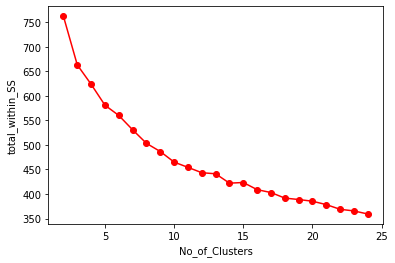

In [20]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [21]:
#DB Scan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [23]:
array=df.values
array
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -7.63290757e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -7.63290757e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -7.63290757e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.31164359e+00, -5.54921603e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.63222988e-01,  9.03662475e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.63222988e-01,  9.03662475e-01]])

In [24]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [25]:
dbscan.labels_

array([ 0,  0,  0, ..., 14, 20, 20], dtype=int64)

In [26]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,19
3995,19
3996,14
3997,20


In [27]:
data1=pd.concat([df,cl],axis=1)
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,11,19
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,11,19
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4,14
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,11,20


In [28]:
result1=data1.iloc[:,1:].groupby(data1.cluster).mean()
result1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID,cluster
cluster,,,,,,,,,,,,,,
-1,146870.904899,551.214217,2.692603,1.055716,1.04707,34042.289145,19.067243,1492.072046,4.347743,4571.806916,0.619597,0.780019,7.714697,-1
0,58066.449468,0.000000,1.771277,1.000000,1.00000,8777.140957,8.696809,75.590426,0.228723,6542.132979,0.000000,2.000000,2.000000,0
1,45719.245714,5.714286,2.291429,1.000000,1.00000,14736.308571,11.342857,160.862857,0.548571,6370.748571,1.000000,0.000000,1.662857,1
2,76536.764706,0.000000,4.941176,1.000000,1.00000,62601.176471,18.294118,70.941176,0.352941,7427.117647,1.000000,0.000000,9.000000,2
3,63292.130435,21.739130,4.000000,1.000000,1.00000,38663.782609,16.217391,43.478261,0.260870,7360.826087,1.000000,0.000000,9.000000,3
4,75146.100000,0.000000,3.000000,1.000000,1.00000,20781.350000,16.150000,30.000000,0.150000,7680.700000,1.000000,0.000000,9.000000,4
5,116198.133333,0.000000,2.933333,1.000000,1.00000,17972.100000,16.466667,73.333333,0.266667,7533.966667,0.000000,2.000000,9.000000,5
6,111219.125000,0.000000,4.000000,1.000000,1.00000,37979.041667,16.458333,62.500000,0.125000,7345.708333,0.000000,2.000000,9.000000,6
7,86241.555556,0.000000,1.000000,1.000000,1.00000,5557.555556,17.222222,0.000000,0.000000,7716.666667,0.000000,2.000000,9.000000,7
